In [ ]:
###########################################################################
# I would like to acknowledge the authors of these task and images.
# Kaggle problem: https://www.kaggle.com/andrewmvd/face-mask-detection
# Source of the data: https://makeml.app/datasets/mask
###########################################################################

In [1]:
!pip install pandas

In [2]:
!pip install sklearn

In [3]:
!pip install matplotlib

In [4]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Import data


In [5]:
face_list = np.load(r'C:\Users\vigne\OneDrive\Desktop\adv_ds_project\face_list_cnn.npy')
face_list.shape

(4072, 100, 100)

In [6]:
# Import combined_df from FeatureEngineering
combined_df = pd.read_csv(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\combined_df_cnn.csv",index_col=[0])
combined_df.rename(columns={'0': 0, '1': 1, '2': 2 }, inplace=True)
combined_df.head()

,Filename,ImgDim,Bndbox,ClassStr,label,0,1,2
0,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[512, 366]","[79, 109, 105, 142]",without_mask,2,0.0,0.0,1.0
1,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[512, 366]","[185, 226, 100, 144]",with_mask,1,0.0,1.0,0.0
2,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[512, 366]","[325, 360, 90, 141]",without_mask,2,0.0,0.0,1.0
3,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[400, 156]","[321, 354, 34, 69]",with_mask,1,0.0,1.0,0.0
4,C:/Users/vigne/OneDrive/Desktop/adv_ds_project...,"[400, 156]","[224, 261, 38, 73]",with_mask,1,0.0,1.0,0.0


# 2. Train test split data

In [7]:
# Reshape image data from 3 dimensions to 2 dimensions
size=face_list.shape[1]
X = np.reshape(face_list, (face_list.shape[0],size,size))
Y = combined_df[[0,1,2]]

In [8]:
Y.shape

(4072, 3)

In [9]:
X.shape

(4072, 100, 100)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.1, random_state=0)
print('Training face_list and label sizes: \n{}, {}'.format(x_train.shape,y_train.shape))
print('Test face_list and label sizes: \n{}, {}'.format(x_validate.shape,y_validate.shape))

Training face_list and label sizes: 
(3664, 100, 100), (3664, 3)
Test face_list and label sizes: 
(408, 100, 100), (408, 3)


# 3. CNN modelling

In [11]:
!pip install tensorflow==2.0

In [12]:
!pip install keras==2.3.0

In [13]:
###
#import tensorflow as tf
#if not tf.__version__ == '2.0':
#    print(tf.__version__)
#    raise ValueError('please upgrade to TensorFlow 2.0.0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [16]:
#batch_size = 64
num_classes = 3
epochs = 30

# input image dimensions
img_rows, img_cols = size, size

if K.image_data_format() == 'channels_first':
    x_train =np.reshape(x_train,(x_train.shape[0], 1, img_rows, img_cols))
    x_validate = np.reshape(x_validate,(x_validate.shape[0], 1, img_rows, img_cols))
    input_shape = (1, img_rows, img_cols)
else:
    x_train = np.reshape(x_train,(x_train.shape[0], img_rows, img_cols, 1))
    x_validate = np.reshape(x_validate,(x_validate.shape[0], img_rows, img_cols, 1))
    input_shape = (img_rows, img_cols, 1)
    

In [17]:
#Please construct the following neural network and report accuracy after training
#Layer 1: 2D Convolution with 32 hidden neurons, kernel 3 by 3, relu activation, kernel as glorot norm weights
#Layer 2: 2D MaxPooling, pool_size 2 by 2
#Layer 3: 2D Convolution with 64 hidden neurons, kernel 3 by 3, relu activation, kernel as glorot norm weights 
#Layer 4: 2D MaxPooling, pool_size 2 by 2
#Layer 5: 25% Dropout
#Layer 6: Flatten (Hint: model.add(Flatten()))
#Layer 7: Fully connected layer with 128 neurons, relu activation
#Layer 8: 50% Dropout
#Layer 9 Softmax Output Layer according to the problem (output vector)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))


In [18]:
from keras.callbacks import ModelCheckpoint

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('CNN_model_{epoch:03d}.model',monitor = 'val_loss',verbose = 0, save_best_only = True, mode = 'auto')

history = model.fit(x_train, y_train,
                      callbacks=[checkpoint],
                      validation_data=(x_validate, y_validate),
                      verbose=1,
                      epochs=30)


Train on 3664 samples, validate on 408 samples
Epoch 1/30
3664/3664 [==============================] - 32s 9ms/step - loss: 0.5931 - accuracy: 0.7863 - val_loss: 0.4742 - val_accuracy: 0.7941
Epoch 2/30
3664/3664 [==============================] - 31s 9ms/step - loss: 0.4587 - accuracy: 0.8084 - val_loss: 0.5114 - val_accuracy: 0.8186
Epoch 3/30
3664/3664 [==============================] - 32s 9ms/step - loss: 0.4143 - accuracy: 0.8382 - val_loss: 0.4079 - val_accuracy: 0.8456
Epoch 4/30
3664/3664 [==============================] - 32s 9ms/step - loss: 0.3887 - accuracy: 0.8540 - val_loss: 0.3799 - val_accuracy: 0.8505
Epoch 5/30
3664/3664 [==============================] - 27s 7ms/step - loss: 0.3446 - accuracy: 0.8728 - val_loss: 0.3255 - val_accuracy: 0.8725
Epoch 6/30
3664/3664 [==============================] - 19s 5ms/step - loss: 0.3317 - accuracy: 0.8769 - val_loss: 0.3365 - val_accuracy: 0.8848
Epoch 7/30
3664/3664 [==============================] - 19s 5ms/step - loss: 0.3198

In [20]:
#model.save(r'C:\Users\vigne\anaconda3\envs\Tensorflow\adv_ds_project\CNN_model_020.model')

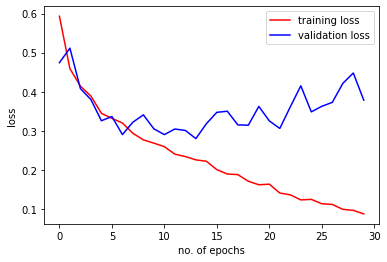

In [21]:
plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], 'b', label = 'validation loss')
plt.xlabel('no. of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

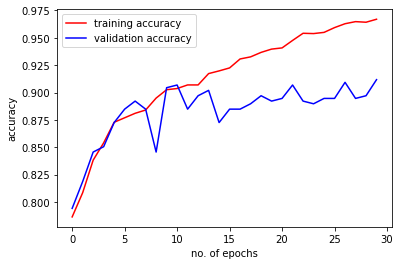

In [22]:
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label = 'validation accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 5. Evaluation - Confusion Matrix

In [38]:

from keras.models import load_model
model = load_model(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\CNN_model_014.model")


print("Evaluate using confusion matrix")
y_pred = model.predict(x_validate)

# for each image in the validation set we need to find the index of the
# label with corresponding largest predicted probability
### One hot encoding to single digit label
y_pred = np.argmax(y_pred, axis=1)

y1 = y_validate.idxmax(axis=1)
y1 = y1.values

# Compare predicted and expected values
from sklearn import metrics
print("Classification report for cnn_model %s:\n%s\n"
      % (model, metrics.classification_report(y1, y_pred)))

Evaluate using confusion matrix
Classification report for cnn_model <keras.engine.sequential.Sequential object at 0x00000248FF6AB848>:
              precision    recall  f1-score   support

           0       0.43      0.25      0.32        12
           1       0.95      0.95      0.95       324
           2       0.79      0.85      0.82        72

    accuracy                           0.91       408
   macro avg       0.72      0.68      0.70       408
weighted avg       0.91      0.91      0.91       408




In [ ]:
# 0 = mask worn wrongly 1 = with mask  2 = without mask


### Visualization - True Positives v.s. False Positives

In [39]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y1, y_pred)
cf #cf[actu][pred]
# pred 0 1 2
# actu
# 0
# 1
# 2

array([[  3,   6,   3],
       [  3, 308,  13],
       [  1,  10,  61]], dtype=int64)

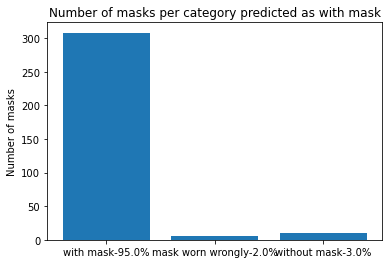

In [40]:
# segregate images with actual labels = 1 when prediction = 1 
img_with_mask1 = cf[1][1]
# segregate images with actual labels = 0 when prediction = 1 
img_worn_wrongly1 = cf[0][1]
# segregate images with actual labels = 2 when prediction = 1 
img_without_mask1 = cf[2][1]

# Find % of images predicted to be 1
t1 = img_with_mask1 + img_worn_wrongly1 + img_without_mask1
p1 = round(img_with_mask1/t1*100)
p0 = round(img_worn_wrongly1/t1*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask1,img_worn_wrongly1,img_without_mask1])
plt.title("Number of masks per category predicted as with mask")
plt.ylabel("Number of masks")
plt.show()

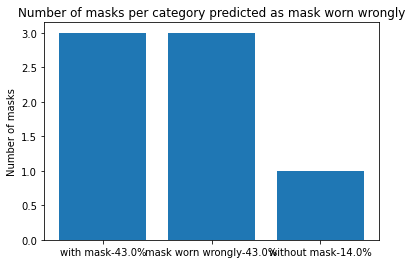

In [41]:
# segregate images with actual labels = 1 when prediction = 0 
img_with_mask0 = cf[1][0]
# segregate images with actual labels = 0 when prediction = 0 
img_worn_wrongly0 = cf[0][0]
# segregate images with actual labels = 2 when prediction = 0 
img_without_mask0 = cf[2][0]

# Find % of images predicted to be 0
t0 = img_with_mask0 + img_worn_wrongly0 + img_without_mask0
p1 = round(img_with_mask0/t0*100)
p0 = round(img_worn_wrongly0/t0*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask0,img_worn_wrongly0,img_without_mask0])
plt.title("Number of masks per category predicted as mask worn wrongly")
plt.ylabel("Number of masks")
plt.show()

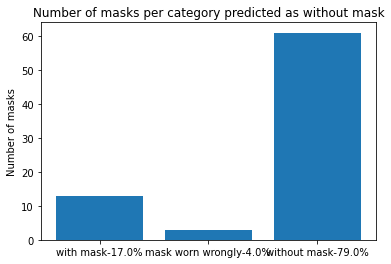

In [42]:
# segregate images with actual labels = 1 when prediction = 2
img_with_mask2 = cf[1][2]
# segregate images with actual labels = 0 when prediction = 2 
img_worn_wrongly2 = cf[0][2]
# segregate images with actual labels = 2 when prediction = 2 
img_without_mask2 = cf[2][2]

# Find % of images predicted to be 2
t2 = img_with_mask2 + img_worn_wrongly2 + img_without_mask2
p1 = round(img_with_mask2/t2*100)
p0 = round(img_worn_wrongly2/t2*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask2,img_worn_wrongly2,img_without_mask2])
plt.title("Number of masks per category predicted as without mask")
plt.ylabel("Number of masks")
plt.show()

### Visualization - True Positives v.s. False Negatives

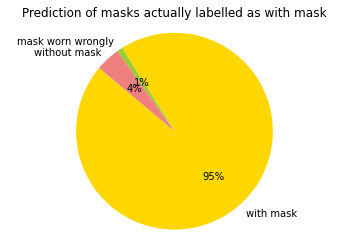

In [43]:
# Prediction of images with actuals labels = 1 (with mask)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_with_mask1, img_with_mask0, img_with_mask2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as with mask")

plt.axis('equal')
plt.show()

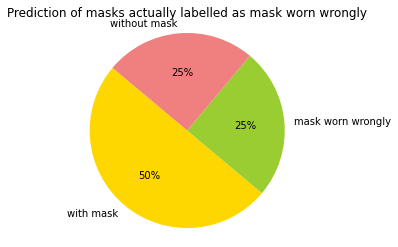

In [44]:
# Prediction of images with actuals labels = 0 (mask worn wrongly)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_worn_wrongly1, img_worn_wrongly0, img_worn_wrongly2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as mask worn wrongly")

plt.axis('equal')
plt.show()

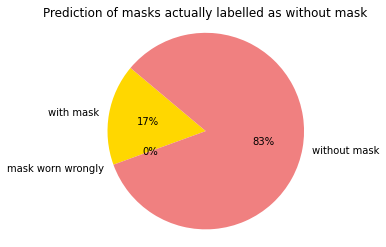

In [36]:
# Prediction of images with actuals labels = 2 (mask worn wrongly)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_without_mask1, img_without_mask0, img_without_mask2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as without mask")

plt.axis('equal')
plt.show()

# 6. Save model

In [45]:
import pickle as pk
pk.dump(model, open(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\cnn_model.pkl","wb"))
